<a id = "cell_exploration"></a>
### 1. Data Exploration


Required Libraries for A1 have been imported to start

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from wordcloud import WordCloud
import math

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk import pos_tag, word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('vader_lexicon')


from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.decomposition import LatentDirichletAllocation as LDA
import gensim.corpora as corpora
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint#
from gensim.models import CoherenceModel

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thilina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/thilina/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv("A1 Data Set.csv") # Data source - Kaggle - Twitter US Airline Sentiment
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [3]:
df.shape

(14640, 15)

Prior to deeper analysis, it is necessary to understand and clean the dataset as required

Checking for any missing values

In [4]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

*   There are some missing values visible in the data frame



In [5]:
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

Next, any duplicates have been looked into

In [6]:
duplicates = df[df.duplicated('tweet_id', keep=False)]
duplicates

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
11879,570308309682675712,negative,1.0000,Customer Service Issue,1.0000,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
11880,570308064185880577,neutral,0.6667,NaN,NaN,American,NaN,LancasterPattie,NaN,0,@AmericanAir we've already made other arrangem...,NaN,2015-02-24 11:43:32 -0800,NaN,NaN
11881,570307949614256128,negative,0.6316,Bad Flight,0.3164,American,NaN,ELLLORRAC,NaN,0,@AmericanAir thanks for getting back to me. Bu...,NaN,2015-02-24 11:43:05 -0800,NaN,Central Time (US & Canada)
11882,570307948171423745,negative,0.6846,Flight Booking Problems,0.6846,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I pay $200 to reactivat...,NaN,2015-02-24 11:43:05 -0800,NaN,Quito
11883,570307434113310720,negative,0.6547,Late Flight,0.3331,American,NaN,LauraMolito,NaN,0,"@AmericanAir stranded for 24 hours in MIA, Pat...",NaN,2015-02-24 11:41:02 -0800,"New York, NY",Atlantic Time (Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,569680231012773888,negative,1.0000,Customer Service Issue,1.0000,American,NaN,LBernieMeyer,NaN,0,@AmericanAir 800 number will not even let you...,NaN,2015-02-22 18:08:45 -0800,NaN,NaN
14386,569622568459636736,negative,1.0000,Customer Service Issue,0.6398,American,NaN,SchrierCar,NaN,0,@AmericanAir I want to speak to a human being!...,NaN,2015-02-22 14:19:38 -0800,NaN,NaN
14392,569621879633391616,negative,1.0000,Customer Service Issue,1.0000,American,NaN,salitron78,NaN,0,@AmericanAir no response to DM or email yet. ...,NaN,2015-02-22 14:16:53 -0800,on @TheJR,Seoul
14543,569601363799359488,negative,1.0000,Flight Attendant Complaints,1.0000,American,NaN,stevereasnors,NaN,0,@AmericanAir should reconsider #usairways acqu...,NaN,2015-02-22 12:55:22 -0800,Los Angeles,Pacific Time (US & Canada)


*   Duplicates can be found in the dataframe


All the duplicates from the dataframe have been dropped while keeping the first row

In [7]:
df = df.drop_duplicates(subset='tweet_id', keep='first')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [8]:
df.shape

(14485, 15)

In [9]:
# Resetting the index
df = df.reset_index()
df = df.drop(columns = 'index')

In [10]:
df["airline_sentiment"].value_counts().sort_values(ascending=False)

negative    9082
neutral     3069
positive    2334
Name: airline_sentiment, dtype: int64

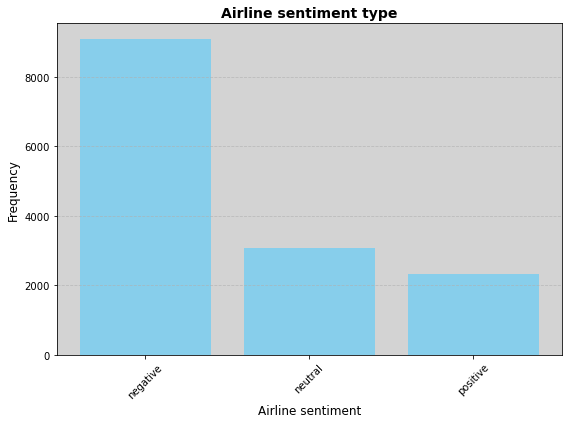

In [11]:
value_counts = df['airline_sentiment'].value_counts()
value_counts = value_counts.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')

plt.xlabel('Airline sentiment', fontsize=12)  # Customizing the font size
plt.ylabel('Frequency', fontsize=12)  # Customizing the font size
plt.title('Airline sentiment type', fontsize=14, fontweight='bold')

# Customizing the tick parameters
plt.xticks(fontsize=10, rotation=45)

# Customizing the grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a background colour
plt.gca().set_facecolor('lightgrey')

# Show the plot
plt.tight_layout()
plt.show()

From the above graph, it should be noted that at a glance the negative sentiments are over 3 times the positive sentiments

Remove/ drop unwanted columns

In [12]:
df = df.drop(columns = ['airline_sentiment_gold' , 'negativereason_gold' , 'tweet_coord' ,
                       'tweet_created' , 'user_timezone'])

In [13]:
group_counts_descending = df["airline"].value_counts().sort_values(ascending=False)
group_counts_descending

United            3822
US Airways        2913
American          2604
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

Plotting a column graph showcasing the Popularity of Airlines - Visualizations always help!

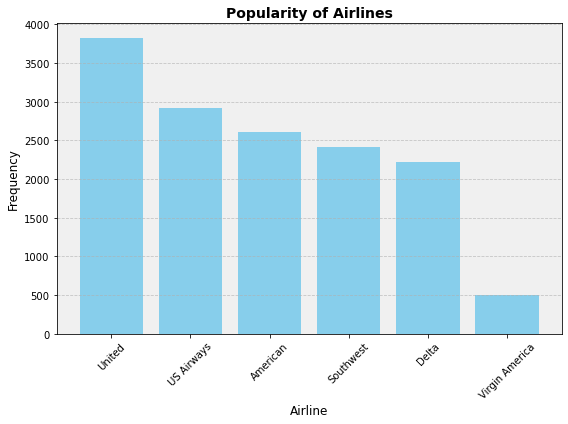

In [14]:
value_counts = df['airline'].value_counts()
value_counts = value_counts.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')

plt.xlabel('Airline', fontsize=12)  # Customizing the font size
plt.ylabel('Frequency', fontsize=12)  # Customizing the font size
plt.title('Popularity of Airlines', fontsize=14, fontweight='bold')

# Customizing the tick parameters
plt.xticks(fontsize=10, rotation=45)

# Customizing the grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a background color (optional)
plt.gca().set_facecolor('#f0f0f0')

# Show the plot
plt.tight_layout()
plt.show()

Based on the number of tweets posted for each airline in the GIVEN dataset, it is possible for us to dive into the popularity of airlines.

1. United is undoubtedly the most popular airline on Twitter boasting with the highest number of tweets of 3822. This might be seen as an indication that United possesses a social media presence that is strong and more engaged attracting a plethora of attention. On the contrary, it could also mean that the airline has issues attracting more negative attention.

2. With 2913 tweets, US Airways maintains a close relationship with United and has a robust social media presence. Their high number of tweets could be an indication that US Airways actively engages with their audience and makes good use of Twitter as a forum for customer interactions and feedback.

3. With 2604 tweets, American ranks third in terms of popularity, demonstrating a sizable Twitter presence. With 2420 tweets, which is a reasonable amount in terms of Twitter activity, Southwest claims the fourth place. Fifth in terms of popularity, Delta generated 2222 tweets. Although not at the top of the list, Delta nonetheless has a strong Twitter following and has probably developed a committed online following that interacts with the brand frequently.

4. With only 504 tweets, Virgin America falls behind the other airlines on the list in terms of Twitter engagement. It's important to keep in mind, though, that the quantity of tweets may not accurately represent the popularity or performance of the airline overall on other platforms or metrics.

As a result, according to the popularity ranking of airlines based on the quantity of tweets, United and US Airways are the most active users on Twitter, closely followed by American and Southwest. Virgin America appears to have a lesser Twitter following than Delta, which holds a respectable position. Airlines can use Twitter to engage with consumers, respond to complaints, and build a favorable brand image, but it's important to take a wider range of indicators into account when evaluating the platform's overall popularity and performance.

Selection of the required columns to identify the most popular states where customers are located for each airline

Dropping the missing values

In [16]:
df_task02 = df_task02.dropna()
df_task02 = df_task02.reset_index()
df_task02 = df_task02.drop(columns = 'index')

Removing the numbers

*   We can see that there are some numbers inside this column, so they have to be removed

In [17]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

df_task02['tweet_location'] = df_task02['tweet_location'].apply(remove_numbers)

df_task02["tweet_location"].value_counts()

Boston, MA                       156
New York, NY                     155
Washington, DC                   145
New York                         125
USA                              125
                                ... 
( Maryland | North Carolina )      1
Glen Burnie                        1
Annapolis, MD USA                  1
University City, MO                1
Nigeria,lagos                      1
Name: tweet_location, Length: 2970, dtype: int64

<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis

Selection of required columns

In [34]:
df_task03 = df.copy()
df_task03 = df_task03[["airline_sentiment", "text"]]
df_task03


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14480,positive,@AmericanAir thank you we got on a different f...
14481,negative,@AmericanAir leaving over 20 minutes Late Flig...
14482,neutral,@AmericanAir Please bring American Airlines to...
14483,negative,"@AmericanAir you have my money, you change my ..."


Data Cleaning is done before proceeding (Text Data)

In [35]:
porter = PorterStemmer()

documents = df_task03['text']
Cleaned_doc = []
for r in range(len(documents)):
    review = documents[r]
    try:

        # Removing phrases starts with 'https'
        review = re.sub(r'http://\S+|https://\S+', '', review)

        # Removing emails
        review = re.sub(r'[\w\.-]+@[\w\.-]+', '', review)

        # Removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review)

        # Making all text lowercase
        review = review.lower()

        words_to_remove = ['virginamerica', 'united', 'southwestair','jetblue','usairways','americanair']
        pattern = r'\b(?:' + '|'.join(re.escape(word) for word in words_to_remove) + r')\b'
        review = re.sub(pattern, '', review)

        # Applying tokenization
        Tokens = review.split()

        # Removing short words
        Filtered_token = [w for w in Tokens if len(w)>3]
        review = ' '.join(Filtered_token)

    except:
        continue
    Cleaned_doc.append(review)

In [36]:
stop_words = stopwords.words('english')

# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item)

In [37]:
# Obtaining the "cleaned" document
df_task03['Cleaned_text'] = Cleaned_doc
df_task03

,airline_sentiment,text,Cleaned_text
0,neutral,@VirginAmerica What @dhepburn said.,dhepburn said
1,positive,@VirginAmerica plus you've added commercials t...,plus added commercials experience tacky
2,neutral,@VirginAmerica I didn't today... Must mean I n...,today must mean need take another trip
3,negative,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,negative,@VirginAmerica and it's a really big bad thing...,really thing
...,...,...,...
14480,positive,@AmericanAir thank you we got on a different f...,thank different flight chicago
14481,negative,@AmericanAir leaving over 20 minutes Late Flig...,leaving minutes late flight warnings communica...
14482,neutral,@AmericanAir Please bring American Airlines to...,please bring american airlines blackberry
14483,negative,"@AmericanAir you have my money, you change my ...",money change flight answer phones suggestions ...


Below, feature extraction has been conducted using "Bag of Words Vectorizer" and "TF-IDF Vectorizer". Following each feature extraction method, the Multinominal Naive Bayes and Random Forest Models have been used to predict the tweet's sentiments.

**Feature Extraction - Bag of Words Vectorizer**

In [38]:
# Tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

text_counts = cv.fit_transform(df_task03['Cleaned_text'])
print('Bag of Word Matrix size: ', text_counts.shape)
print('Data in the first row:\n', text_counts[1,:])

Bag of Word Matrix size:  (14485, 10491)
Data in the first row:
   (0, 6897)	1
  (0, 113)	1
  (0, 1820)	1
  (0, 3196)	1
  (0, 9045)	1


Split the vector into training and testing data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df_task03['airline_sentiment'], test_size=0.3, random_state=1)

**01. Multinomial Naive Bayes Model**

In [40]:
clf = MultinomialNB().fit(X_train, y_train)
predicted_mlb= clf.predict(X_test)
print("MultinomialNB Accuracy:", round(metrics.accuracy_score(y_test, predicted_mlb),3))

MultinomialNB Accuracy: 0.739


In [41]:
# Compute the confusion matrix
confusion_mat_mlb = confusion_matrix(y_test, predicted_mlb)

# Display the confusion matrix
print("Confusion Matrix: MNB")
print(confusion_mat_mlb)

Confusion Matrix: MNB
[[2504  123   71]
 [ 540  317   83]
 [ 258   59  391]]


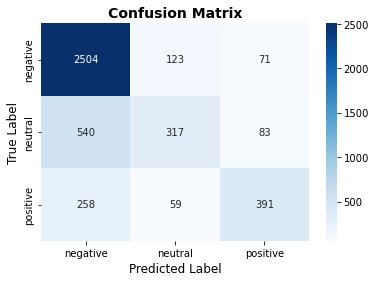

In [42]:
# Define the labels for the rows and columns of the confusion matrix (class names)
class_names = ['negative', 'neutral', 'positive']

# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat_mlb, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

# Customizing the labels, title, and axes
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

In [43]:
# Classification Report
class_report = classification_report(y_test, predicted_mlb)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.93      0.83      2698
     neutral       0.64      0.34      0.44       940
    positive       0.72      0.55      0.62       708

    accuracy                           0.74      4346
   macro avg       0.70      0.61      0.63      4346
weighted avg       0.73      0.74      0.72      4346



**02. Random Forest Model**

In [44]:
# Create and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
predicted_rf = rf_classifier.predict(X_test)
print("Random forest Accuracy:", round(metrics.accuracy_score(y_test, predicted_rf),3))

Random forest Accuracy: 0.739


In [45]:
# Compute the confusion matrix
confusion_mat_rf = confusion_matrix(y_test, predicted_rf)

# Display the confusion matrix
print("Confusion Matrix: RF")
print(confusion_mat_rf)

Confusion Matrix: RF
[[2298  294  106]
 [ 361  476  103]
 [ 165  107  436]]


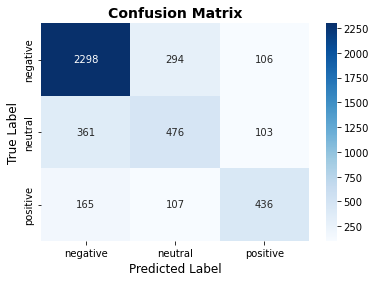

In [46]:
# Define the labels for the rows and columns of the confusion matrix (class names)
class_names = ['negative', 'neutral', 'positive']

# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

# Customizing the labels, title, and axes
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

In [47]:
# Classification Report
class_report = classification_report(y_test, predicted_rf)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.85      0.83      2698
     neutral       0.54      0.51      0.52       940
    positive       0.68      0.62      0.64       708

    accuracy                           0.74      4346
   macro avg       0.68      0.66      0.67      4346
weighted avg       0.73      0.74      0.74      4346



**Feature Extraction - TF-IDF Vectorizer**

In [48]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', tokenizer=token.tokenize)

# Fit and transform the 'Cleaned_text' data using TF-IDF vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(df_task03['Cleaned_text'])

# Print the size of the TF-IDF matrix
print('TF-IDF Matrix size:', tfidf_matrix.shape)

# Print the data in the first row of the TF-IDF matrix
print('Data in the first row:\n', tfidf_matrix[0, :])

TF-IDF Matrix size: (14485, 10491)
Data in the first row:
   (0, 7929)	0.48080164381817436
  (0, 2518)	0.876829390076394


Split the vector into training and testing sets

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix, df_task03['airline_sentiment'], test_size=0.3, random_state=1)

**01. Multinomial Naives Bayes Model**

In [50]:
clf = MultinomialNB().fit(X_train, y_train)
predicted_mlb= clf.predict(X_test)
print("MultinomialNB Accuracy:", round(metrics.accuracy_score(y_test, predicted_mlb),3))

MultinomialNB Accuracy: 0.685


In [51]:
# Compute the confusion matrix
confusion_mat_mlb = confusion_matrix(y_test, predicted_mlb)

# Display the confusion matrix
print("Confusion Matrix: MNB")
print(confusion_mat_mlb)

Confusion Matrix: MNB
[[2676   18    4]
 [ 767  150   23]
 [ 530   29  149]]


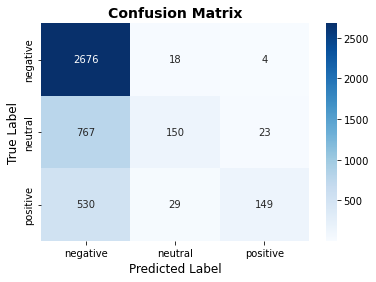

In [52]:
# Define the labels for the rows and columns of the confusion matrix (class names)
class_names = ['negative', 'neutral', 'positive']

# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat_mlb, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

# Customizing the labels, title, and axes
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

In [53]:
# Classification Report
class_report = classification_report(y_test, predicted_mlb)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    negative       0.67      0.99      0.80      2698
     neutral       0.76      0.16      0.26       940
    positive       0.85      0.21      0.34       708

    accuracy                           0.68      4346
   macro avg       0.76      0.45      0.47      4346
weighted avg       0.72      0.68      0.61      4346



**02. Random Forest Model**

In [54]:
# Create and train the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
predicted_rf = rf_classifier.predict(X_test)
print("Random forest Accuracy:", round(metrics.accuracy_score(y_test, predicted_rf),3))

Random forest Accuracy: 0.748


In [55]:
# Compute the confusion matrix
confusion_mat_rf = confusion_matrix(y_test, predicted_rf)

# Display the confusion matrix
print("Confusion Matrix: RF")
print(confusion_mat_rf)

Confusion Matrix: RF
[[2469  161   68]
 [ 454  392   94]
 [ 240   78  390]]


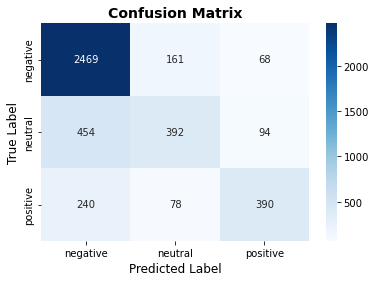

In [56]:
# Define the labels for the rows and columns of the confusion matrix (class names)
class_names = ['negative', 'neutral', 'positive']

# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

# Customizing the labels, title, and axes
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')

# Show the plot
plt.show()

In [57]:
# Classification Report
class_report = classification_report(y_test, predicted_rf)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.92      0.84      2698
     neutral       0.62      0.42      0.50       940
    positive       0.71      0.55      0.62       708

    accuracy                           0.75      4346
   macro avg       0.70      0.63      0.65      4346
weighted avg       0.73      0.75      0.73      4346



**Lexicon Based Approach**

Select only the most popular airlines (Top 3)

In [58]:
group_counts_descending = df["airline"].value_counts().sort_values(ascending=False)
group_counts_descending = group_counts_descending.reset_index()
group_counts_descending

,index,airline
0,United,3822
1,US Airways,2913
2,American,2604
3,Southwest,2420
4,Delta,2222
5,Virgin America,504


In [59]:
airline_companies = group_counts_descending['index'].to_list()
airline_companies_top3 = airline_companies[:3]
airline_companies_top3

['United', 'US Airways', 'American']

In [60]:
df_task04 = df[df['airline'].isin(airline_companies_top3)]
df_task04 = df_task04[['airline' ,'airline_sentiment', 'text']]
df_task04 = df_task04.reset_index()
df_task04 = df_task04.drop(columns = 'index')
df_task04

,airline,airline_sentiment,text
0,United,positive,@united thanks
1,United,positive,@united Thanks for taking care of that MR!! Ha...
2,United,negative,@united still no refund or word via DM. Please...
3,United,negative,@united Delayed due to lack of crew and now de...
4,United,positive,@united thanks -- we filled it out. How's our ...
...,...,...,...
9334,American,positive,@AmericanAir thank you we got on a different f...
9335,American,negative,@AmericanAir leaving over 20 minutes Late Flig...
9336,American,neutral,@AmericanAir Please bring American Airlines to...
9337,American,negative,"@AmericanAir you have my money, you change my ..."


In [61]:
porter = PorterStemmer()

documents = df_task04['text']
Cleaned_doc = []
for r in range(len(documents)):
    review = documents[r]
    try:

        # Remove phrases starts with 'https'
        review = re.sub(r'http://\S+|https://\S+', '', review)

        # Remove emails
        review = re.sub(r'[\w\.-]+@[\w\.-]+', '', review)

        # Removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review)

        # Make all text lowercase
        review = review.lower()

        words_to_remove = ['virginamerica', 'united', 'southwestair','jetblue','usairways','americanair']
        pattern = r'\b(?:' + '|'.join(re.escape(word) for word in words_to_remove) + r')\b'
        review = re.sub(pattern, '', review)

        # Apply tokenization
        Tokens = review.split()

        # Removing short words
        Filtered_token = [w for w in Tokens if len(w)>3]
        review = ' '.join(Filtered_token)

    except:
        continue
    Cleaned_doc.append(review)

In [62]:
stop_words = stopwords.words('english')

# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item)

df_task04['Cleaned_text'] = Cleaned_doc
df_task04

,airline,airline_sentiment,text,Cleaned_text
0,United,positive,@united thanks,thanks
1,United,positive,@united Thanks for taking care of that MR!! Ha...,thanks taking care happy customer
2,United,negative,@united still no refund or word via DM. Please...,still refund word please resolve issue cancell...
3,United,negative,@united Delayed due to lack of crew and now de...,delayed lack crew delayed long line deicing st...
4,United,positive,@united thanks -- we filled it out. How's our ...,thanks filled luck common
...,...,...,...,...
9334,American,positive,@AmericanAir thank you we got on a different f...,thank different flight chicago
9335,American,negative,@AmericanAir leaving over 20 minutes Late Flig...,leaving minutes late flight warnings communica...
9336,American,neutral,@AmericanAir Please bring American Airlines to...,please bring american airlines blackberry
9337,American,negative,"@AmericanAir you have my money, you change my ...",money change flight answer phones suggestions ...


In [63]:
# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis and store the results in new columns
df_task04['sentiment_score'] = df_task04['Cleaned_text'].apply(lambda text: sia.polarity_scores(text)['compound'])

# Define a function to assign sentiment labels based on the sentiment score
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score == 0:
        return 'neutral'
    else:
        return 'negative'

df_task04['sentiment_label'] = df_task04['sentiment_score'].apply(get_sentiment_label)

# Analyze the results
df_task04

,airline,airline_sentiment,text,Cleaned_text,sentiment_score,sentiment_label
0,United,positive,@united thanks,thanks,0.4404,positive
1,United,positive,@united Thanks for taking care of that MR!! Ha...,thanks taking care happy customer,0.8689,positive
2,United,negative,@united still no refund or word via DM. Please...,still refund word please resolve issue cancell...,0.0258,positive
3,United,negative,@united Delayed due to lack of crew and now de...,delayed lack crew delayed long line deicing st...,-0.2960,negative
4,United,positive,@united thanks -- we filled it out. How's our ...,thanks filled luck common,0.7096,positive
...,...,...,...,...,...,...
9334,American,positive,@AmericanAir thank you we got on a different f...,thank different flight chicago,0.3612,positive
9335,American,negative,@AmericanAir leaving over 20 minutes Late Flig...,leaving minutes late flight warnings communica...,-0.7003,negative
9336,American,neutral,@AmericanAir Please bring American Airlines to...,please bring american airlines blackberry,0.3182,positive
9337,American,negative,"@AmericanAir you have my money, you change my ...",money change flight answer phones suggestions ...,0.3818,positive


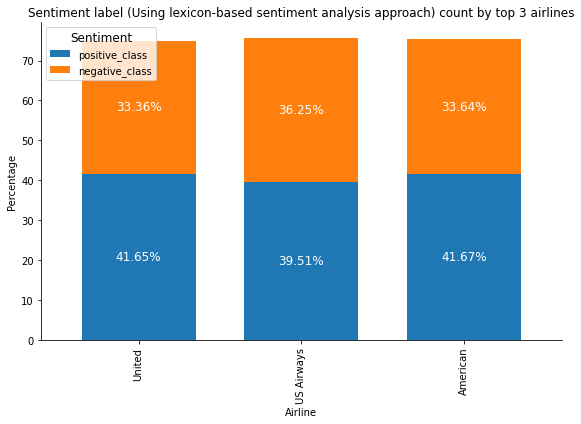

In [64]:
pclass_counts = df_task04['airline'].value_counts()
positive_cls = df_task04[df_task04['sentiment_label'] == 'positive']['airline'].value_counts() / pclass_counts * 100
negative_cls = df_task04[df_task04['sentiment_label'] == 'negative']['airline'].value_counts() / pclass_counts * 100

# Create a DataFrame to hold the calculated percentages
percentage_df = pd.DataFrame({'positive_class': positive_cls, 'negative_class': negative_cls})

# Plot the bar graph with percentages
ax = percentage_df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], width=0.7, figsize=(8, 6))

# Set the y-axis label to "Percentage"
ax.set_ylabel("Percentage")

# Set the plot title and x-axis label
ax.set_title("Sentiment label (Using lexicon-based sentiment analysis approach) count by top 3 airlines")
ax.set_xlabel("Airline")

# Calculate the cumulative heights for annotation placement
cumulative_heights = [0] * len(percentage_df.index)
for p in ax.patches:
    percentage = f"{p.get_height():.2f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() / 2 + cumulative_heights[int(x)]
    cumulative_heights[int(x)] += p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=12, color='white')

# Customize legend
ax.legend(title='Sentiment', title_fontsize=12, loc='upper left')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

In [65]:
df_task04

,airline,airline_sentiment,text,Cleaned_text,sentiment_score,sentiment_label
0,United,positive,@united thanks,thanks,0.4404,positive
1,United,positive,@united Thanks for taking care of that MR!! Ha...,thanks taking care happy customer,0.8689,positive
2,United,negative,@united still no refund or word via DM. Please...,still refund word please resolve issue cancell...,0.0258,positive
3,United,negative,@united Delayed due to lack of crew and now de...,delayed lack crew delayed long line deicing st...,-0.2960,negative
4,United,positive,@united thanks -- we filled it out. How's our ...,thanks filled luck common,0.7096,positive
...,...,...,...,...,...,...
9334,American,positive,@AmericanAir thank you we got on a different f...,thank different flight chicago,0.3612,positive
9335,American,negative,@AmericanAir leaving over 20 minutes Late Flig...,leaving minutes late flight warnings communica...,-0.7003,negative
9336,American,neutral,@AmericanAir Please bring American Airlines to...,please bring american airlines blackberry,0.3182,positive
9337,American,negative,"@AmericanAir you have my money, you change my ...",money change flight answer phones suggestions ...,0.3818,positive


In [66]:
sentiment_airline = df_task04.groupby(["airline", "sentiment_label"]).size().reset_index(name="count")
sentiment_airline

,airline,sentiment_label,count
0,American,negative,876
1,American,neutral,643
2,American,positive,1085
3,US Airways,negative,1056
4,US Airways,neutral,706
5,US Airways,positive,1151
6,United,negative,1275
7,United,neutral,955
8,United,positive,1592


<a id = "cell_TopicModeling"></a>
### 4. Topic Modeling


Select only the required columns

In [67]:
df_task05 = df.copy()
df_task05 = df_task05[["airline_sentiment", "text"]]
df_task05

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14480,positive,@AmericanAir thank you we got on a different f...
14481,negative,@AmericanAir leaving over 20 minutes Late Flig...
14482,neutral,@AmericanAir Please bring American Airlines to...
14483,negative,"@AmericanAir you have my money, you change my ..."


Selecting only the negative tweets

In [68]:
df_task05 = df_task05[df_task05['airline_sentiment']=="negative"]
df_task05 = df_task05.reset_index()
df_task05 = df_task05.drop(columns = 'index')
df_task05

,airline_sentiment,text
0,negative,@VirginAmerica it's really aggressive to blast...
1,negative,@VirginAmerica and it's a really big bad thing...
2,negative,@VirginAmerica seriously would pay $30 a fligh...
3,negative,@VirginAmerica SFO-PDX schedule is still MIA.
4,negative,@VirginAmerica I flew from NYC to SFO last we...
...,...,...
9077,negative,@AmericanAir thx for nothing on getting us out...
9078,negative,@AmericanAir my flight was Cancelled Flightled...
9079,negative,@AmericanAir right on cue with the delays👌
9080,negative,@AmericanAir leaving over 20 minutes Late Flig...


Data Cleaning

In [69]:
porter = PorterStemmer()

documents = df_task05['text']
Cleaned_doc = []
for r in range(len(documents)):
    review = documents[r]
    try:

        # Remove phrases starts with 'https'
        review = re.sub(r'http://\S+|https://\S+', '', review)

        # Remove emails
        review = re.sub(r'[\w\.-]+@[\w\.-]+', '', review)

        # removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review)

        # make all text lowercase
        review = review.lower()

        words_to_remove = ['virginamerica', 'united', 'southwestair','jetblue','usairways','americanair']
        pattern = r'\b(?:' + '|'.join(re.escape(word) for word in words_to_remove) + r')\b'
        review = re.sub(pattern, '', review)

        # apply tokenization
        Tokens = review.split()

        Filtered_token = [w for w in Tokens if len(w)>3]
        review = ' '.join(Filtered_token)

    except:
        continue
    #Save cleaned text
    Cleaned_doc.append(review)

In [70]:
stop_words = stopwords.words('english')
# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item)

Selection of only nouns

In [71]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

each_item = []
for r in range(len(Cleaned_doc)):
    review = Cleaned_doc[r]

    # Apply tokenization
    Tokens = review.split()

    # POS tagging
    tagged_tokens = nltk.pos_tag(Tokens)

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    nouns = [lemmatizer.lemmatize(word, pos='n') for word, tag in tagged_tokens if tag.startswith('N')]

    # Print(nouns)
    Cleaned_doc[r] = ' '.join(nouns)

[nltk_data] Downloading package punkt to /Users/thilina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/thilina/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/thilina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [72]:
df_task05['cleaned_data'] = Cleaned_doc
df_task05

,airline_sentiment,text,cleaned_data
0,negative,@VirginAmerica it's really aggressive to blast...,blast entertainment guest recourse
1,negative,@VirginAmerica and it's a really big bad thing...,thing
2,negative,@VirginAmerica seriously would pay $30 a fligh...,flight seat thing
3,negative,@VirginAmerica SFO-PDX schedule is still MIA.,schedule
4,negative,@VirginAmerica I flew from NYC to SFO last we...,week gentleman side help
...,...,...,...
9077,negative,@AmericanAir thx for nothing on getting us out...,nothing country plane
9078,negative,@AmericanAir my flight was Cancelled Flightled...,flight leaving tomorrow morning auto night fli...
9079,negative,@AmericanAir right on cue with the delays👌,delay
9080,negative,@AmericanAir leaving over 20 minutes Late Flig...,minute flight warning communication minute fli...


In [73]:
count_vectorizer = CountVectorizer()

count_data = count_vectorizer.fit_transform(Cleaned_doc)

Most Common Words

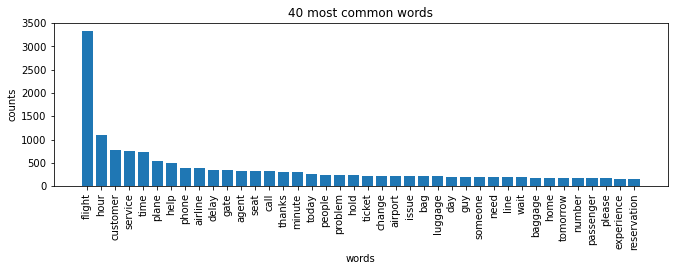

In [74]:
terms = count_vectorizer.get_feature_names_out()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts += t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x: x[1], reverse=True)[0:40]  # Take the top 40 words

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))

plt.figure(2, figsize=(11, 3))
plt.subplot(title='40 most common words')
plt.bar(words, counts)
plt.xticks(x_pos, words, rotation=90)
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

Remove highly frequent (Greater than 20%) and infrequent words (less than 1%)

In [75]:
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 1000 and total_counts[t] > 50:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

# Save the remaining term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex]
ReducedCount

Number of Terms Remained:  116


<9082x116 sparse matrix of type '<class 'numpy.int64'>'
	with 17510 stored elements in Compressed Sparse Row format>

**LDA**

Selection of the optimum number of topics

In [76]:
Cleaned_doc_new = []
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
             each_item.append(t)
    Cleaned_doc_new.append(each_item)

In [77]:
# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_new)

# Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_new]

In [78]:
# Train model using bag of word representation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                       id2word=id2word,
                                       num_topics=9,
                                       random_state=100)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=9))
doc_lda = lda_model[Corpus]

[(0,
  '0.315*"customer" + 0.280*"service" + 0.083*"bag" + 0.028*"help" + '
  '0.021*"computer" + 0.019*"thanks" + 0.018*"vacation" + 0.018*"home" + '
  '0.015*"baggage"'),
 (1,
  '0.169*"plane" + 0.093*"minute" + 0.075*"need" + 0.072*"hold" + 0.063*"wait" '
  '+ 0.059*"line" + 0.054*"night" + 0.040*"someone" + 0.040*"help"'),
 (2,
  '0.156*"thanks" + 0.118*"ticket" + 0.091*"issue" + 0.079*"change" + '
  '0.062*"connection" + 0.053*"mile" + 0.049*"time" + 0.044*"talk" + '
  '0.040*"person"'),
 (3,
  '0.131*"tomorrow" + 0.111*"seat" + 0.082*"today" + 0.078*"weather" + '
  '0.070*"home" + 0.069*"please" + 0.041*"morning" + 0.028*"help" + '
  '0.028*"business"'),
 (4,
  '0.146*"time" + 0.094*"airline" + 0.091*"help" + 0.069*"system" + '
  '0.068*"guy" + 0.050*"nothing" + 0.044*"anything" + 0.038*"travel" + '
  '0.031*"work"'),
 (5,
  '0.195*"agent" + 0.128*"gate" + 0.095*"people" + 0.044*"thing" + '
  '0.044*"hotel" + 0.041*"help" + 0.037*"employee" + 0.034*"min" + '
  '0.033*"credit"'),


In [79]:
# Text input format (Cleaned_doc_new) instead of bag of words
coherence_model_lda = CoherenceModel(model=lda_model,
                                     texts=Cleaned_doc_new,
                                     dictionary=id2word,
                                     coherence='c_v')


coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3216980251668777


In [80]:
#Evaluation models with topics numbers from 2 to 10
Topics = list(range(2,11,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=100)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=Cleaned_doc_new,
                                         dictionary=id2word,
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores
    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Topic Number: 2 -- Coherence: 0.22809653562546509
Topic Number: 3 -- Coherence: 0.2272986899755587
Topic Number: 4 -- Coherence: 0.2589192192203402
Topic Number: 5 -- Coherence: 0.27881120923785996
Topic Number: 6 -- Coherence: 0.3057332569868972
Topic Number: 7 -- Coherence: 0.31262009119799583
Topic Number: 8 -- Coherence: 0.31807411566951715
Topic Number: 9 -- Coherence: 0.3216980251668777
Topic Number: 10 -- Coherence: 0.2927762854573977


Text(0, 0.5, 'Coherence')

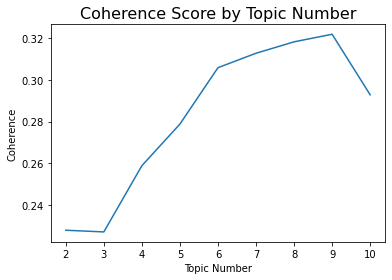

In [81]:
pyplot.figure(figsize=(6,4))
pyplot.plot(coherence_scores)
pyplot.xticks(range(0,len(Topics)),Topics)
pyplot.title('Coherence Score by Topic Number', fontsize=16)
pyplot.xlabel('Topic Number')
pyplot.ylabel('Coherence')

We have to select optimum number of topics as 9 as this is where the coherence score peaks as seen in the above line graph

In [82]:
# Tweak the two parameters below
number_topics = 9

lda = LDA(n_components=number_topics, n_jobs=-1, random_state=2023)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_

array([[1.15784205e+02, 1.11120861e-01, 1.11120956e-01, ...,
        1.15397890e+02, 1.11118052e-01, 1.11118796e-01],
       [3.23440961e-01, 1.11119390e-01, 1.11118771e-01, ...,
        1.11128215e-01, 1.11114464e-01, 1.11121984e-01],
       [1.11139212e-01, 1.11128897e-01, 1.11128644e-01, ...,
        1.11131833e-01, 1.11126663e-01, 1.11125034e-01],
       ...,
       [2.16225570e+02, 1.11124667e-01, 2.24111006e+02, ...,
        1.11132215e-01, 1.11119058e-01, 8.51109978e+01],
       [1.11127820e-01, 3.88111001e+02, 1.11128781e-01, ...,
        2.38241751e+01, 1.11130843e-01, 1.11120064e-01],
       [1.11133955e-01, 1.11125563e-01, 1.11124074e-01, ...,
        1.11141333e-01, 1.11128796e-01, 1.11138807e-01]])

In [83]:
# Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

[[4.95586055e-02 4.75625748e-05 4.75626156e-05 ... 4.93932530e-02
  4.75613728e-05 4.75616908e-05]
 [1.54919784e-04 5.32232895e-05 5.32229932e-05 ... 5.32275168e-05
  5.32209300e-05 5.32245321e-05]
 [4.39116057e-05 4.39075303e-05 4.39074300e-05 ... 4.39086903e-05
  4.39066475e-05 4.39060038e-05]
 ...
 [1.20162511e-01 6.17550416e-05 1.24544666e-01 ... 6.17592361e-05
  6.17519246e-05 4.72985283e-02]
 [5.44957800e-05 1.90325085e-01 5.44962516e-05 ... 1.16830962e-02
  5.44972626e-05 5.44919769e-05]
 [5.22191678e-05 5.22152243e-05 5.22145249e-05 ... 5.22226343e-05
  5.22167435e-05 5.22214476e-05]]


In [84]:
for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))


Topic #0:
plane : 0.235
help : 0.173
gate : 0.146
tomorrow : 0.075
need : 0.068

Topic #1:
call : 0.157
minute : 0.143
thanks : 0.126
hold : 0.112
someone : 0.095

Topic #2:
customer : 0.305
service : 0.302
delay : 0.137
home : 0.072
flightr : 0.055

Topic #3:
people : 0.138
luggage : 0.119
reservation : 0.092
response : 0.081
check : 0.081

Topic #4:
ticket : 0.133
issue : 0.129
bag : 0.128
system : 0.088
please : 0.088

Topic #5:
day : 0.113
guy : 0.111
weather : 0.089
nothing : 0.079
min : 0.067

Topic #6:
seat : 0.183
airport : 0.125
agent : 0.120
connection : 0.086
hotel : 0.077

Topic #7:
time : 0.364
airline : 0.190
problem : 0.116
week : 0.067
person : 0.045

Topic #8:
phone : 0.186
today : 0.127
passenger : 0.080
number : 0.062
email : 0.058


In [85]:
#### Assigning names to each topic

## Topic 0 - Helping at the gate
## Topic 1 - call was on hold
## Topic 2 - customer service
## Topic 3 - luggage and reservation issues
## Topic 4 - tickets and system issues
## Topic 5 - date and weather changes
## Topic 6 - facility issues (Seats and hotels)
## Topic 7 - delay on flights
## Topic 8 - hotlines issues

In [86]:
# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords

,agent,airline,airport,answer,anyone,anything,attendant,bag,baggage,board,...,voucher,wait,weather,website,week,wife,wifi,work,year,yesterday
0,0.049559,0.000048,0.000048,0.000048,0.044562,0.041994,0.000048,0.000048,0.000048,0.000048,...,0.000048,0.011131,0.000048,0.000048,0.000048,0.000048,0.000048,0.049393,0.000048,0.000048
1,0.000155,0.000053,0.000053,0.000067,0.000053,0.000053,0.000053,0.000053,0.062496,0.000053,...,0.000053,0.030787,0.000053,0.000053,0.000053,0.015448,0.024481,0.000053,0.000053,0.000053
2,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,0.000044,...,0.000044,0.000044,0.000044,0.000044,0.000044,0.005460,0.000044,0.000044,0.000044,0.000044
3,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,0.048684,0.000064,0.000064,0.000064,...,0.000064,0.039657,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064,0.000064
4,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.000065,0.128053,0.000065,0.054415,...,0.000065,0.000065,0.000065,0.025493,0.000065,0.000065,0.000065,0.000065,0.047403,0.000065
5,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,...,0.000061,0.000061,0.089184,0.000061,0.000061,0.000591,0.000061,0.000061,0.000061,0.000061
6,0.120163,0.000062,0.124545,0.000062,0.000062,0.000062,0.000062,0.000062,0.028755,0.000062,...,0.036184,0.000062,0.000062,0.000062,0.000062,0.003630,0.006174,0.000062,0.000062,0.047299
7,0.000054,0.190325,0.000054,0.000054,0.000054,0.000055,0.000054,0.000054,0.000054,0.000055,...,0.000054,0.000055,0.000054,0.000054,0.066747,0.000054,0.000054,0.011683,0.000054,0.000054
8,0.000052,0.000052,0.000052,0.035280,0.000052,0.000052,0.000052,0.000052,0.000052,0.000052,...,0.000052,0.014017,0.000052,0.007331,0.000052,0.006051,0.000052,0.000052,0.000052,0.000052
